In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
company_name = df['Car_Name'].apply(lambda x:x.split(' ')[0])
df.insert(3,'company_name',company_name)
df.head()

,Car_Name,Year,Selling_Price,company_name,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,ritz,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,sx4,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,ciaz,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,wagon,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,swift,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.drop('Car_Name',axis=1,inplace=True)
df.head()

,Year,Selling_Price,company_name,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,ritz,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,sx4,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,ciaz,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,wagon,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,swift,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
df.company_name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon', 'swift', 'vitara', 's', 'alto',
       'ertiga', 'dzire', 'ignis', '800', 'baleno', 'omni', 'fortuner',
       'innova', 'corolla', 'etios', 'camry', 'land', 'Royal', 'UM',
       'KTM', 'Bajaj', 'Hyosung', 'Mahindra', 'Honda', 'Yamaha', 'TVS',
       'Hero', 'Activa', 'Suzuki', 'i20', 'grand', 'i10', 'eon', 'xcent',
       'elantra', 'creta', 'verna', 'city', 'brio', 'amaze', 'jazz'],
      dtype=object)

In [8]:
df.isnull().sum()

Year             0
Selling_Price    0
company_name     0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

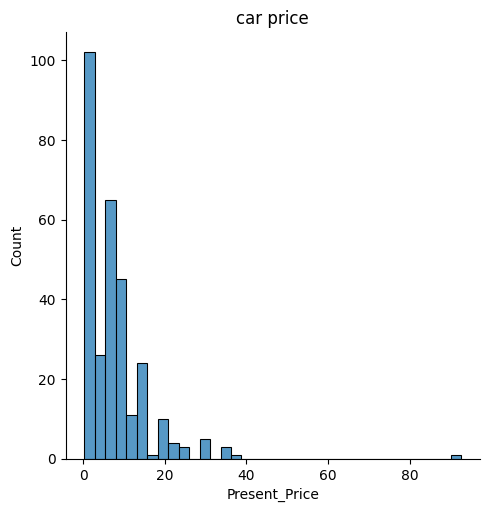

In [9]:
sns.displot(df.Present_Price)
plt.title("car price")
plt.show()

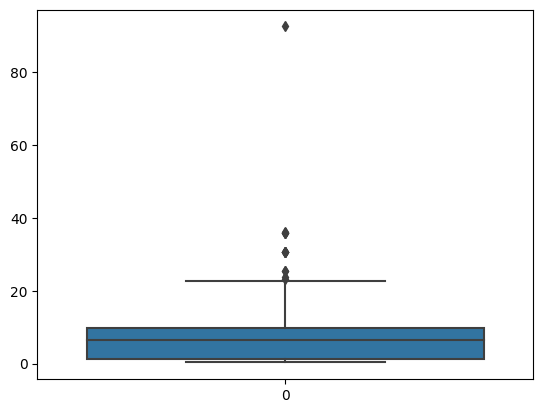

In [10]:
sns.boxplot(df.Present_Price)
plt.show()

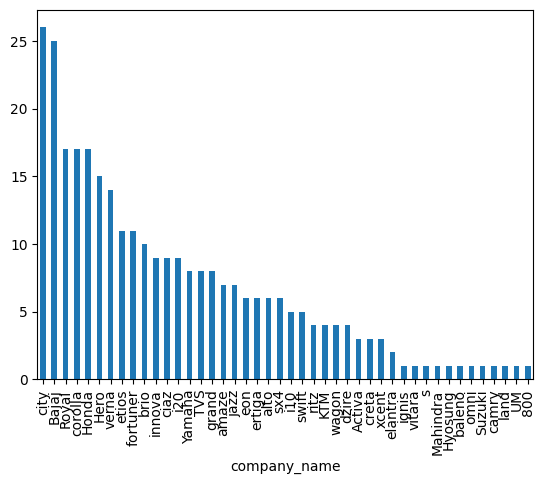

In [11]:
df.company_name.value_counts().plot(kind='bar')
plt.show()

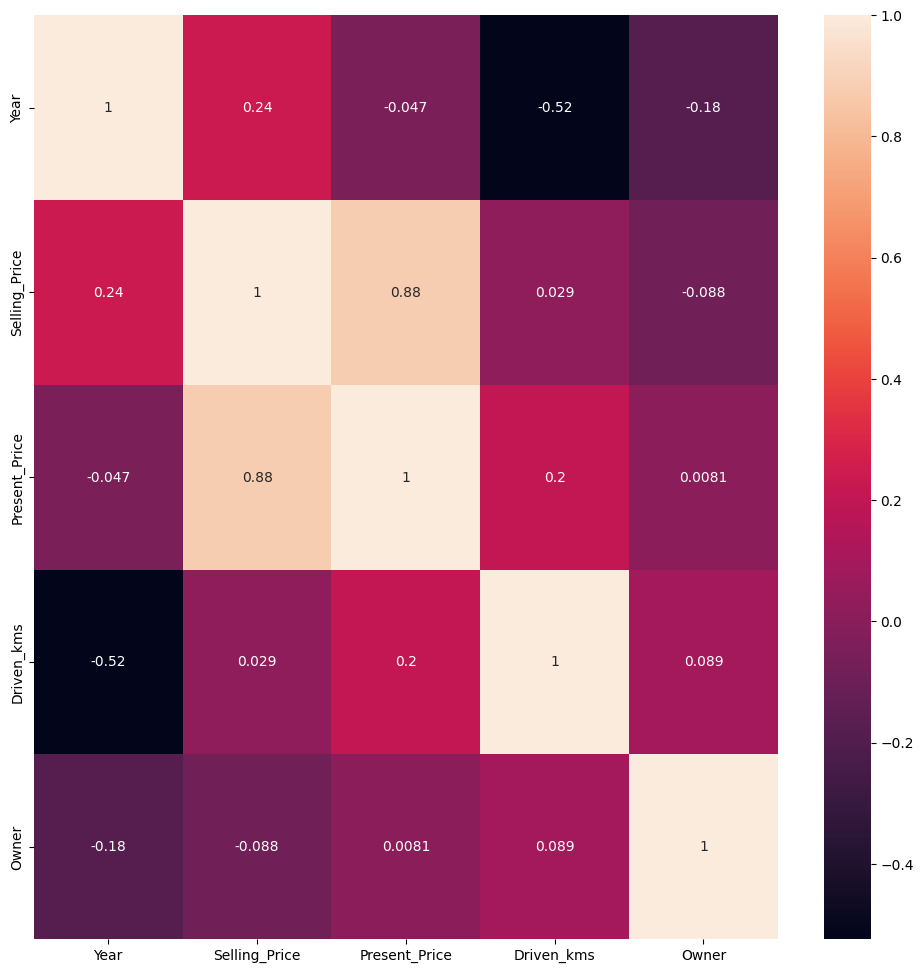

In [12]:
df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df.columns


Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

In [14]:
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = df.pop('Present_Price')
y = df

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(y,x)
import statsmodels.api as sm
y = sm.add_constant(y)
lm = sm.OLS(x,y).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Present_Price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     402.7
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          2.31e-118
Time:                        13:33:56   Log-Likelihood:                -795.41
No. Observations:                 301   AIC:                             1601.
Df Residuals:                     296   BIC:                             1619.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1411.2324    171.165      8.245